In [2]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

#matplotlib
import matplotlib.pyplot as plt
from statsmodels import api as sm
from matplotlib.patches import Rectangle
import matplotlib.patches as mpatches
import seaborn as sns
import joypy

DIR=r'C:\Users\Yhara\Desktop\hackathon'

# Exploration 

# question 1

In [3]:
df = pd.read_csv(os.path.join(DIR, 'handouts_fhs.csv'))

In [4]:
df.head(10)

,randid,death,angina,hospmi,mi_fchd,anychd,stroke,cvd,hyperten,timeap,...,heartrte3,glucose3,prevchd3,prevap3,prevmi3,prevstrk3,prevhyp3,hdlc3,ldlc3,bmidiff
0,2448,No,No,Yes,Yes,Yes,No,Yes,No,24.000000,...,69.0,92.0,No,No,No,No,No,31.0,178.0,NaN
1,6238,No,No,No,No,No,No,No,No,24.000000,...,80.0,71.0,No,No,No,No,No,54.0,141.0,-0.70
2,9428,No,No,No,No,No,No,No,No,24.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
3,10552,Yes,No,No,No,No,Yes,Yes,Yes,8.093087,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.60
4,11252,No,No,No,No,No,No,No,Yes,24.000000,...,74.0,NaN,No,No,No,No,Yes,NaN,NaN,-0.38
5,11263,No,No,No,Yes,Yes,No,Yes,Yes,24.000000,...,86.0,81.0,No,No,No,No,Yes,46.0,135.0,-1.06
6,12629,No,Yes,No,No,Yes,No,No,Yes,1.021218,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.65
7,12806,No,No,No,No,No,No,No,Yes,24.000000,...,75.0,87.0,No,No,No,No,No,34.0,286.0,-0.51
8,14367,No,No,No,No,No,No,No,Yes,24.000000,...,92.0,82.0,No,No,No,No,Yes,44.0,236.0,0.97
9,16365,No,No,No,No,No,No,No,Yes,24.000000,...,75.0,85.0,No,No,No,No,Yes,48.0,163.0,-3.89


In [5]:
df_head_10 = df.head(10)
display(df_head_10['sysbp1'].describe())

#other way
print("maximal SBP for 10 first records %.2f" % (max(df_head_10['sysbp1'])))
print("minimal SBP for 10 first records %.2f" % (min(df_head_10['sysbp1'])))

count     10.000000
mean     135.600000
std       24.426534
min      100.000000
25%      122.625000
50%      134.000000
75%      147.875000
max      180.000000
Name: sysbp1, dtype: float64

maximal SBP for 10 first records 180.00
minimal SBP for 10 first records 100.00


# question 2

In [6]:
dummy = pd.get_dummies(df['death'])
df_cat = df.merge(dummy['Yes'],left_index=True, right_index=True)
df_cat = df_cat.rename({'Yes':'dead'},axis=1)

print("have died during cohort: %d"% df_cat['dead'].sum())

dead_count = df_cat['dead'].sum()
print("percentage of dead people out of all cohort: %.2f"% (dead_count/len(df_cat)))

#do we have missing values in the death column?
print("ammount of nan values in the deat column: %d" % df_cat['death'].isna().sum())

#no nan values because as default all patients are alive when registered and during the cohort the data is updated 

have died during cohort: 1550
percentage of dead people out of all cohort: 0.35
ammount of nan values in the deat column: 0


# question 3

In [11]:
# missing values in second check-up

# collect relevant columns:
second_check_cols = [col for col in df.columns if '2' in col]
sec_df = df[second_check_cols]
display(sec_df.isna().sum())

#hdlc2 and ldlc2 were not collected. (detailed in the fermingham documentation)
#gender is missing probably because of technical issues. lets double check:
print("number of mussing values in the first gender recording: %d" % df['sex1'].isna().sum())

#we can observe the 504 consistently appears in the missing values summary. let se if how much rows we have with zero values,
#reffering to the second check-up.

sub = sec_df[sec_df.isnull().all(axis=1)]
print("number of records where all parameters values are missing: %d" % len(sub))

def func_check_mani(row, columns):
    for col in time_cols:
        if row[col]<6:
            return True
    return False
#maybe these patiens have dies? lets check if they have suffered in the last 6 years from any kind of CV manifestation
time_cols = [col for col in df.columns if 'time' in col]
check_df = df.loc[sub.index]
df['CV_mani'] = df.apply(lambda row: func_check_mani(row, time_cols),axis=1 )
print(len(df[df['CV_mani']]))

sex2          504
totchol2      647
age2          504
sysbp2        504
diabp2        504
cursmoke2     504
cigpday2      537
bmi2          520
diabetes2     504
bpmeds2       590
heartrte2     505
glucose2      985
prevchd2      504
prevap2       504
prevmi2       504
prevstrk2     504
prevhyp2      504
hdlc2        4434
ldlc2        4434
dtype: int64

number of mussing values in the first gender recording: 0
number of records where all parameters values are missing: 504
2330


# question 4

In [12]:
# collect relevant columns:
first_check_cols = [col for col in df.columns if '1' in col]
first_df = df[first_check_cols]
display(first_df.isna().sum())

sex1            0
totchol1       52
age1            0
sysbp1          0
diabp1          0
cursmoke1       0
cigpday1       32
bmi1           19
diabetes1       0
bpmeds1        61
heartrte1       1
glucose1      397
prevchd1        0
prevap1         0
prevmi1         0
prevstrk1       0
prevhyp1        0
hdlc1        4434
ldlc1        4434
dtype: int64

In [13]:
binary=[]
df_copy = df.copy()

for col in df.columns:
    unique_vals = df[col].unique()
    vals = unique_vals[~pd.isnull(unique_vals)] #remove nan values
    if len(vals) < 10: #set reasonable treshold       
        vals.sort()
        df_copy[col] = df_copy[col].replace(dict(zip(vals, np.arange(len(vals)))))
        binary.append(col)

cv_mani = binary[1:8]
sub_df_cv_mani = df_copy[cv_mani]
sub_df_cv_mani['rel_mani'] = sub_df_cv_mani.apply(lambda row: row.sum(), axis=1)


C:\Users\Yhara\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [14]:
sub_df_cv_mani.head()

,angina,hospmi,mi_fchd,anychd,stroke,cvd,hyperten,rel_mani
0,0,1,1,1,0,1,0,4
1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0
3,0,0,0,0,1,1,1,3
4,0,0,0,0,0,0,1,1


# visualization

# question 1

angina       725
hospmi       454
mi_fchd      731
anychd      1240
stroke       415
cvd         1157
hyperten    3252
rel_mani    7974
dtype: int64

Text(0.5, 0, 'Type of CV Manifestations')

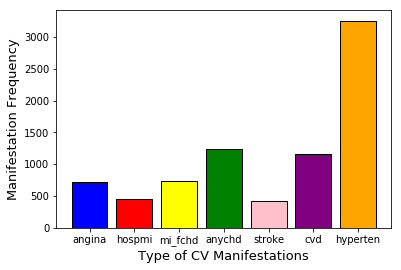

In [15]:
display(sub_df_cv_mani.sum())
count_mani = sub_df_cv_mani.sum()
count_mani = count_mani[:-1]#create a bar plot
fig,ax = plt.subplots()

ax.bar(np.arange(0,len(count_mani)),count_mani, tick_label=cv_mani,
       color=['blue','red','yellow','green','pink','purple','orange'],edgecolor='black')
ax.set_ylabel('Manifestation Frequency',fontsize=13)
ax.set_xlabel('Type of CV Manifestations', fontsize=13)

# question 2

No handles with labels found to put in legend.


timeap angina
timemi hospmi
timemifc mi_fchd
timechd anychd
timestrk stroke
timecvd cvd
timehyp hyperten


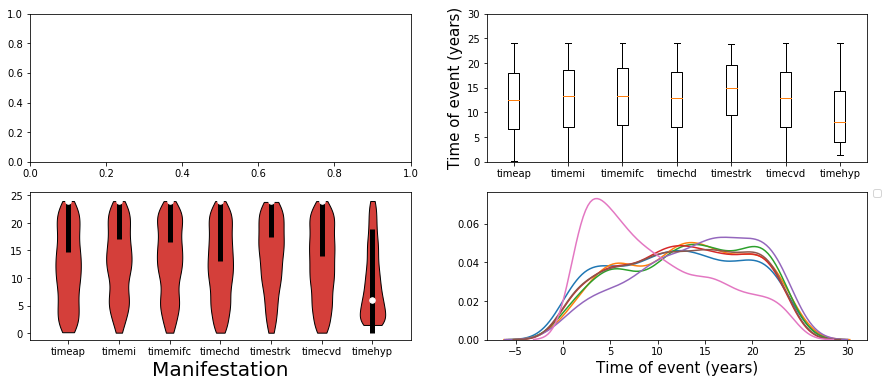

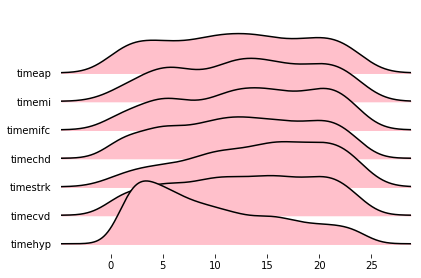

In [52]:
time_cols = [col for col in df.columns if 'time' in col]
time_cols.remove('timedth') #alligned to the prevopus cvd manifestations

#histogram
fig,ax = plt.subplots(nrows = 2, ncols = 2,figsize=(15, 6))
bins=np.linspace(0, df[col].max(),100) # maximal value-24
for i,col in enumerate(time_cols):
    temp = df[df[cv_mani[i]]=='Yes'][col].dropna().values
    temp_final = temp[temp>0]
    ax[0,0]=sns.kdeplot(temp_final)
    print(col , cv_mani[i])
ax[0,0].set_xlabel('Time of event (years)', fontsize=15)
ax[0,0].legend(bbox_to_anchor=(1.05, 1.05))

values_for_bp = [df[df[cv_mani[i]]=='Yes'][col].dropna().values for i,col in enumerate(time_cols)]
values_for_bp = [val[val>0] for val in values_for_bp]

#boxplot
bp = ax[0,1].boxplot(values_for_bp,whis = 1.5, widths=0.2, )
ax[0,1].set_ylim(0,30)
ax[0,1].set_xticklabels(time_cols, fontsize = 10)
ax[0,1].set_ylabel('Time of event (years)',  fontsize = 15)

#violin plot
vp = ax[1,0].violinplot(values_for_bp, showmeans=False, showmedians=False,showextrema=False)
def set_axis_style(ax, labels):
    ax.get_xaxis().set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(1, len(labels) + 1))
    ax.set_xticklabels(labels)
    ax.set_xlim(0.25, len(labels) + 0.75)
    ax.set_xlabel('Manifestation', fontsize=20)

set_axis_style(ax[1,0], time_cols)

def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals[:-1])

    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, vals[0], q1)
    return lower_adjacent_value, upper_adjacent_value

#pretty violin plot
for pc in vp['bodies']:
    pc.set_facecolor('#D43F3A')
    pc.set_edgecolor('black')
    pc.set_alpha(1)

quartile1, medians, quartile3 = np.percentile([df[col].dropna() for col in time_cols], [25, 50, 75], axis=1)
whiskers = np.array([
    adjacent_values(sorted_array, q1, q3)
    for sorted_array, q1, q3 in zip([df[col].dropna() for col in time_cols], quartile1, quartile3)])
whiskersMin, whiskersMax = whiskers[:, 0], whiskers[:, 1]

inds = np.arange(1, len(medians) + 1)
ax[1,0].scatter(inds, medians, marker='o', color='white', s=30, zorder=3)
ax[1,0].vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=5)
# ax[1,0].vlines(inds, whiskersMin, dem, color='k', linestyle='-', lw=1)


ax[1,1] = joypy.joyplot(values_for_bp,labels = time_cols,color ='pink')


# question 3

In [53]:
#get quantiles of bmi

val_bmi = df['bmi1'].dropna().values
val_bmi.sort()

def get_percintle(values,i):
    quant_vals = [] 
    for val in values:
        if i>1:
            if val <= np.percentile(values, i*10) and val > np.quantile(values, (i-1)/10):
                quant_vals.append(val)
        else:
            if val <= np.percentile(values, i*10) and val >= np.quantile(values, (i-1)/10):
                quant_vals.append(val)
    return quant_vals

final_bmi = [get_percintle(val_bmi,i)for i in range(1,11)]

Text(0.5, 0, 'Percintles')

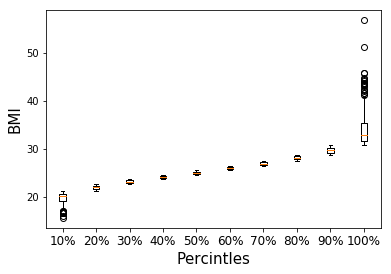

In [54]:
#boxplot
fig,ax = plt.subplots()
bp = ax.boxplot(final_bmi,whis = 1.5, widths=0.2, )
ax.set_xticklabels(['%s' % (str(i*10)+'%') for i in range(1,11)] , fontsize = 12)
ax.set_ylabel('BMI',  fontsize = 15)
ax.set_xlabel('Percintles', fontsize=15)

# Integration

In [55]:
for col in df.columns:
    if 'ldlc' or 'hdlc' in col:
        if df[col].isna().sum() == len(df):
            print("emmpty col: %s" % col)
            df = df.drop(col, axis=1)

clean_df = df.dropna(how='any')

emmpty col: hdlc1
emmpty col: ldlc1
emmpty col: hdlc2
emmpty col: ldlc2


C:\Users\Yhara\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Yhara\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


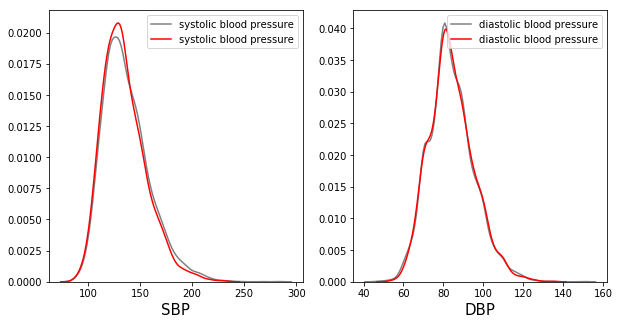

In [56]:
#check distribuion
#in seaborn
fig, axs = plt.subplots(1,2,figsize = (10, 5))

sns.kdeplot(df['sysbp2'],ax=axs[0], label='systolic blood pressure',color='gray')
sns.kdeplot(clean_df['sysbp2'],ax=axs[0], label='systolic blood pressure',color='red')
axs[0].set_xlabel('SBP', fontsize=15)
axs[0].legend()

sns.kdeplot(df['diabp2'],ax=axs[1], label='diastolic blood pressure',color='gray')
sns.kdeplot(clean_df['diabp2'],ax=axs[1], label='diastolic blood pressure',color='red')
axs[1].set_xlabel('DBP', fontsize=15)
axs[1].legend()

C:\Users\Yhara\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


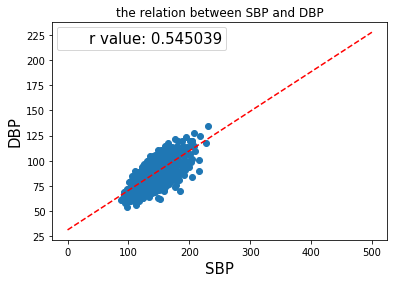

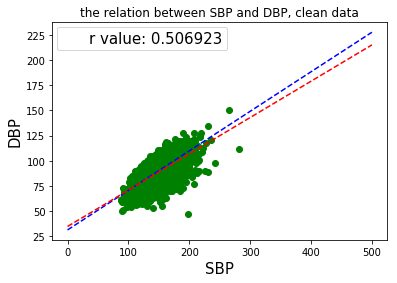

In [57]:
fig, ax = plt.subplots()
ax.scatter(clean_df['sysbp2'],clean_df['diabp2'])
ax.set_title('the relation between SBP and DBP')
ax.set_xlabel('SBP', fontsize=15)
ax.set_ylabel('DBP', fontsize=15)

#linear regression example
#drop NaNs
reg_df=clean_df[['sysbp2','diabp2']]
reg_df=reg_df.dropna()

y = reg_df['diabp2']
x = sm.add_constant(reg_df['sysbp2']) 

regression_model = sm.OLS(y, x)
regression_results = regression_model.fit()

regression_x = np.array([0, 500]) #depends on your values range
regression_y = regression_results.predict(sm.add_constant(regression_x)) 

r_value=regression_results.rsquared
ax.plot(regression_x, regression_y, '--', color='red')

extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
legend = plt.legend([extra],("r value: %f" % r_value,))
text = legend.get_texts()[0]
props = text.get_font_properties().copy()
text.set_fontproperties(props)
text.set_size(15)

fig, ax = plt.subplots()
ax.scatter(df['sysbp2'],df['diabp2'],color = 'green')
ax.plot(regression_x, regression_y, '--', color='blue')
ax.set_title('the relation between SBP and DBP, clean data')
ax.set_xlabel('SBP', fontsize=15)
ax.set_ylabel('DBP', fontsize=15)


reg_df=df[['sysbp2','diabp2']]
reg_df=reg_df.dropna()

y = reg_df['diabp2']
x = sm.add_constant(reg_df['sysbp2']) 

regression_model = sm.OLS(y, x)
regression_results = regression_model.fit()

regression_x = np.array([0, 500]) #depends on your values range
regression_y = regression_results.predict(sm.add_constant(regression_x)) 

r_value=regression_results.rsquared
ax.plot(regression_x, regression_y, '--', color='red')
extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
legend = plt.legend([extra],("r value: %f" % r_value,))
text = legend.get_texts()[0]
props = text.get_font_properties().copy()
text.set_fontproperties(props)
text.set_size(15)